In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import re
from nltk.tokenize import word_tokenize

In [4]:
# investigation of interrigation words
# https://sv.wikipedia.org/wiki/Fr%C3%A5geord

q_words = ['vad', 'hur', 'när', 'var', 'varifrån', 'varför', 'vart', 'vilken', 'vilket', 'vilka', 'vem', 'vems'] 

In [5]:
# load the data
df_train = pd.read_pickle("./data_frames/df_train.pkl")
df_test = pd.read_pickle("./data_frames/df_test.pkl")
df_dp_train = pd.read_pickle("./data_frames/dependency_parsing/df_dp_train.pkl")
df_dp_test = pd.read_pickle("./data_frames/dependency_parsing/df_dp_test.pkl")
df_dp_train.head()

,answer,answer_words,answer_pos,answer_deprel,answer_root,answer_root_pos,sent_with_ans,sent_words,sent_pos,sent_deprel,...,sent_root_pos,question,q_words,q_pos,q_deprel,q_root,q_root_pos,answer_root_word,sent_root_word,q_root_word
0,ett tillstånd för att resa in och vara i ett land,"[en, tillstånd, för, att, resa, in, och, vara,...","[DET, NOUN, ADP, PART, VERB, ADV, CCONJ, AUX, ...","[det, root, mark, mark, advcl, compound:prt, c...",tillstånd,NOUN,visum är ett tillstånd för att resa in och var...,"[visum, vara, en, tillstånd, för, att, resa, i...","[NOUN, AUX, DET, NOUN, ADP, PART, VERB, ADV, C...","[nsubj, cop, det, root, mark, mark, advcl, com...",...,NOUN,vad är ett visum,"[vad, vara, en, visum]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,tillstånd,tillstånd,vad
1,ditt pass,"[du, pass]","[PRON, NOUN]","[nmod:poss, root]",pass,NOUN,när du ska hämta ditt beslut ska du ta med dit...,"[när, du, skola, hämta, du, beslut, skola, du,...","[SCONJ, PRON, AUX, VERB, PRON, NOUN, AUX, PRON...","[mark, nsubj, aux, advcl, nmod:poss, obj, aux,...",...,VERB,vad ska du ta med när du hämtar ditt beslut,"[vad, skola, du, ta, med, när, du, hämta, du, ...","[PRON, AUX, PRON, VERB, ADP, SCONJ, PRON, VERB...","[obj, aux, nsubj, root, compound:prt, mark, ns...",ta,VERB,pass,ta,ta
2,ett år,"[en, år]","[DET, NOUN]","[det, root]",år,NOUN,ett uppehållstillstånd för besök gäller som lä...,"[en, uppehållstillstånd, för, besök, gälla, so...","[DET, NOUN, ADP, NOUN, VERB, SCONJ, ADV, ADV, ...","[det, nsubj, case, nmod, root, advmod, advmod,...",...,VERB,hur länge gäller ett uppehållstillstånd för be...,"[hur, länge, gälla, en, uppehållstillstånd, fö...","[ADV, ADV, VERB, DET, NOUN, ADP, NOUN, CCONJ, ...","[advmod, advmod, root, det, nsubj, case, nmod,...",gälla,VERB,år,gäller,gäller
3,ett bevis,"[en, bevis]","[DET, NOUN]","[det, root]",bevis,NOUN,kortet är ett bevis på att du har tillstånd at...,"[kort, vara, en, bevis, på, att, du, ha, tills...","[NOUN, AUX, DET, NOUN, ADP, SCONJ, PRON, VERB,...","[nsubj, cop, det, root, mark, mark, nsubj, adv...",...,NOUN,vad är ett uppehållstillståndskort,"[vad, vara, en, uppehållstillståndskort]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,bevis,bevis,vad
4,ett bevis,"[en, bevis]","[DET, NOUN]","[det, root]",bevis,NOUN,kortet är ett bevis på att du har tillstånd at...,"[kort, vara, en, bevis, på, att, du, ha, tills...","[NOUN, AUX, DET, NOUN, ADP, SCONJ, PRON, VERB,...","[nsubj, cop, det, root, mark, mark, nsubj, adv...",...,NOUN,vad är ett uppehållstillståndskort,"[vad, vara, en, uppehållstillståndskort]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,bevis,bevis,vad


In [6]:
def map_interrogative_words(df, all_q_words):
    interrogative_words = []
    for index, row in df.iterrows():
        interrogative_words_in_q = []
        # q_words = row['q_words'] # lemmatized words in the question
        q_words = word_tokenize(row['question'])
        # find the question word that is used in the question
        for q_w in all_q_words:
            if q_w in q_words:
                interrogative_words_in_q.append(q_w)
        
        if len(interrogative_words_in_q) < 1:
            # fix for weird words in the dataset..
            if 'vemvilka' in q_words:
                interrogative_words_in_q.append('vem')
            elif 'viket' in q_words:
                interrogative_words_in_q.append('vilket')

        interrogative_words.append(interrogative_words_in_q)

    return interrogative_words

df_dp_train['interrogative_words'] = map_interrogative_words(df_dp_train, q_words)
df_dp_train.head()
        

,answer,answer_words,answer_pos,answer_deprel,answer_root,answer_root_pos,sent_with_ans,sent_words,sent_pos,sent_deprel,...,question,q_words,q_pos,q_deprel,q_root,q_root_pos,answer_root_word,sent_root_word,q_root_word,interrogative_words
0,ett tillstånd för att resa in och vara i ett land,"[en, tillstånd, för, att, resa, in, och, vara,...","[DET, NOUN, ADP, PART, VERB, ADV, CCONJ, AUX, ...","[det, root, mark, mark, advcl, compound:prt, c...",tillstånd,NOUN,visum är ett tillstånd för att resa in och var...,"[visum, vara, en, tillstånd, för, att, resa, i...","[NOUN, AUX, DET, NOUN, ADP, PART, VERB, ADV, C...","[nsubj, cop, det, root, mark, mark, advcl, com...",...,vad är ett visum,"[vad, vara, en, visum]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,tillstånd,tillstånd,vad,[vad]
1,ditt pass,"[du, pass]","[PRON, NOUN]","[nmod:poss, root]",pass,NOUN,när du ska hämta ditt beslut ska du ta med dit...,"[när, du, skola, hämta, du, beslut, skola, du,...","[SCONJ, PRON, AUX, VERB, PRON, NOUN, AUX, PRON...","[mark, nsubj, aux, advcl, nmod:poss, obj, aux,...",...,vad ska du ta med när du hämtar ditt beslut,"[vad, skola, du, ta, med, när, du, hämta, du, ...","[PRON, AUX, PRON, VERB, ADP, SCONJ, PRON, VERB...","[obj, aux, nsubj, root, compound:prt, mark, ns...",ta,VERB,pass,ta,ta,"[vad, när]"
2,ett år,"[en, år]","[DET, NOUN]","[det, root]",år,NOUN,ett uppehållstillstånd för besök gäller som lä...,"[en, uppehållstillstånd, för, besök, gälla, so...","[DET, NOUN, ADP, NOUN, VERB, SCONJ, ADV, ADV, ...","[det, nsubj, case, nmod, root, advmod, advmod,...",...,hur länge gäller ett uppehållstillstånd för be...,"[hur, länge, gälla, en, uppehållstillstånd, fö...","[ADV, ADV, VERB, DET, NOUN, ADP, NOUN, CCONJ, ...","[advmod, advmod, root, det, nsubj, case, nmod,...",gälla,VERB,år,gäller,gäller,[hur]
3,ett bevis,"[en, bevis]","[DET, NOUN]","[det, root]",bevis,NOUN,kortet är ett bevis på att du har tillstånd at...,"[kort, vara, en, bevis, på, att, du, ha, tills...","[NOUN, AUX, DET, NOUN, ADP, SCONJ, PRON, VERB,...","[nsubj, cop, det, root, mark, mark, nsubj, adv...",...,vad är ett uppehållstillståndskort,"[vad, vara, en, uppehållstillståndskort]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,bevis,bevis,vad,[vad]
4,ett bevis,"[en, bevis]","[DET, NOUN]","[det, root]",bevis,NOUN,kortet är ett bevis på att du har tillstånd at...,"[kort, vara, en, bevis, på, att, du, ha, tills...","[NOUN, AUX, DET, NOUN, ADP, SCONJ, PRON, VERB,...","[nsubj, cop, det, root, mark, mark, nsubj, adv...",...,vad är ett uppehållstillståndskort,"[vad, vara, en, uppehållstillståndskort]","[PRON, AUX, DET, NOUN]","[root, cop, det, nsubj]",vad,PRON,bevis,bevis,vad,[vad]


In [7]:
def print_interrogative_word_statistics(key, value, word_stats):
    # value is a map where the word type is the key and count is an obj with 'count' as a key
    for pos in value.keys():
        stats = word_stats[pos]
        print('-------------------')
        print('pos tag: ', pos)
        print('root words, selection: ', stats['roots'][:10])
    plt.bar(value.keys(), value.values(), color='g')
    plt.title('Word class distribution of answer root for interregation word \"'+ key + '\"')
    plt.show()


def print_interrogative_word_appearance(word_stats_dict):
    plt.bar(word_stats_dict.keys(), word_stats_dict.values(), color='b')
    plt.title('Occurence of interrogative words in dataset')
    plt.show()



In [8]:
def get_interrogative_word_statistics(df, type):
    interrogative_word_stats = {}
    interrogative_word_ans_root_map = {}
    interrogative_word_ans_root_map_count = {}
    for index, row in df.iterrows():
        answer_root_pos = row[type+'_root_pos'] # type can be answer / sent
        answer_root = row[type+'_root']
        question_words = row['interrogative_words']
        for q_w in question_words:
            if q_w in interrogative_word_ans_root_map:
                # count the appearance of the question word
                interrogative_word_stats[q_w] += 1
                if answer_root_pos in interrogative_word_ans_root_map[q_w]:
                    # data structure not saving the actual words
                    interrogative_word_ans_root_map_count[q_w][answer_root_pos] += 1
                    # data structure saving the root words
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['count'] += 1
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['roots'].append(answer_root)
                else:
                    interrogative_word_ans_root_map_count[q_w][answer_root_pos] = 1

                    interrogative_word_ans_root_map[q_w][answer_root_pos] = {}
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['count'] = 1
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['roots'] = [answer_root]
            else:
                # Add to the stats of the question word
                interrogative_word_stats[q_w] = 1
                # add to the map quetion_pos -> root
                interrogative_word_ans_root_map_count[q_w] = { answer_root_pos: 1 }
                interrogative_word_ans_root_map[q_w] = {answer_root_pos: { 'count': 1, 'roots': [answer_root]}}
    return interrogative_word_ans_root_map, interrogative_word_ans_root_map_count, interrogative_word_stats



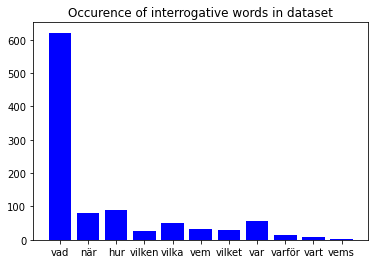

-------------------
pos tag:  NOUN
root words, selection:  ['tillstånd', 'pass', 'bevis', 'bevis', 'bevis', 'fingeravtryck', 'fingeravtryck', 'foto', 'elinstallatör', 'föräldramöte']
-------------------
pos tag:  VERB
root words, selection:  ['återvända', 'riskera', 'få', 'bli', 'kontakta', 'ställa', 'arbeta', 'ansöka', 'riskera', 'utsätta']
-------------------
pos tag:  ADJ
root words, selection:  ['ifylld', 'uppfylld', 'ifylld', 'uppmärksam', 'antagen', 'datorstyrd', 'kalla', 'utlägd', 'låg', 'skyldig']
-------------------
pos tag:  PRON
root words, selection:  ['de', 'den', 'man']
-------------------
pos tag:  ADV
root words, selection:  ['intensiv', 'dagtid']
-------------------
pos tag:  NUM
root words, selection:  ['11831', '23', '2']
-------------------
pos tag:  PROPN
root words, selection:  ['viking']


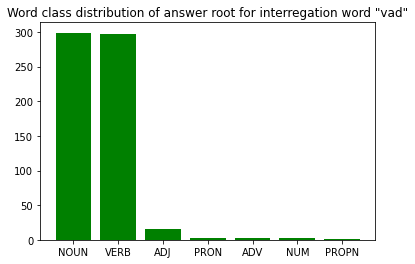

-------------------
pos tag:  NOUN
root words, selection:  ['pass', 'år', 'år', 'år', 'eumedborgare', 'september', 'år', 'september', 'programmering', 'immunförsvar']
-------------------
pos tag:  VERB
root words, selection:  ['finnas', 'påminna', 'flytta', 'få', 'lämna', 'ha', 'resa', 'boka', 'ha', 'bli']
-------------------
pos tag:  ADJ
root words, selection:  ['uppfylld', 'klar']
-------------------
pos tag:  NUM
root words, selection:  ['sju', '28', '216', '28', '213', '212']
-------------------
pos tag:  PRON
root words, selection:  ['den']


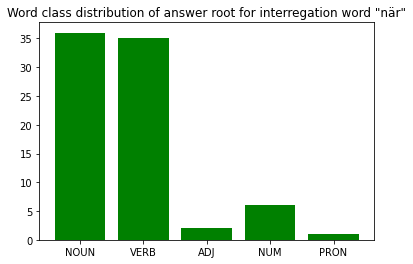

-------------------
pos tag:  NOUN
root words, selection:  ['år', 'år', 'dag', 'timme', 'vecka', 'år', 'månad', 'visummärke', 'år', 'beskrivning']
-------------------
pos tag:  NUM
root words, selection:  ['16', '45', '3', '3', '14', '3', '13', 'fem', '2', '9']
-------------------
pos tag:  VERB
root words, selection:  ['fatta', 'meddela', 'flytta', 'ställa', 'följa', 'testa']
-------------------
pos tag:  ADJ
root words, selection:  ['ensam', 'inrikta', 'ren']
-------------------
pos tag:  PRON
root words, selection:  ['en', 'man']


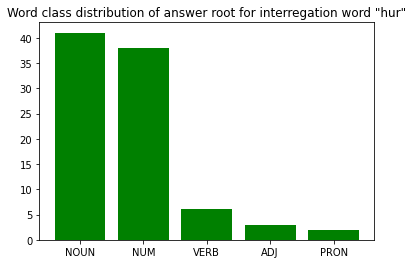

-------------------
pos tag:  NUM
root words, selection:  ['7', '18']
-------------------
pos tag:  NOUN
root words, selection:  ['arbetsplats', 'vecka', 'centralbanken', 'merit', 'påsvetsning', 'termitsvetsning', 'vecka', 'psykoanalyt', 'psykoterapi', 'år']
-------------------
pos tag:  ADJ
root words, selection:  ['transportekonomisk']
-------------------
pos tag:  PROPN
root words, selection:  ['linköping', 'friedrich']


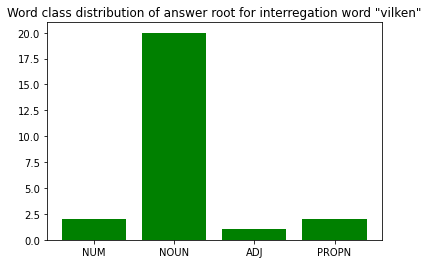

-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'organisation', 'tjänsteman', 'arbetsgivare', 'skola', 'centralbanken', 'medborgare', 'skolbibliotek', 'specialpedagog', 'flygteknik']
-------------------
pos tag:  VERB
root words, selection:  ['omfatta']
-------------------
pos tag:  PROPN
root words, selection:  ['sverige', 'sverige']
-------------------
pos tag:  ADJ
root words, selection:  ['ung']


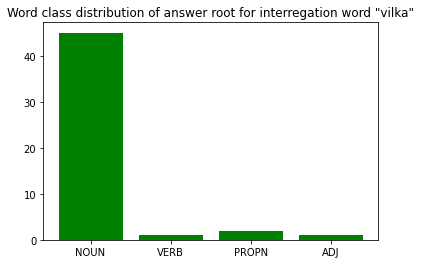

-------------------
pos tag:  NOUN
root words, selection:  ['huvudman', 'organisation', 'rektor', 'arbetsgivare', 'veterinär', 'veterinär', 'säljare', 'flygtekniker', 'arbetsgivare', 'beställare']
-------------------
pos tag:  ADJ
root words, selection:  ['minderårig']
-------------------
pos tag:  PRON
root words, selection:  ['den']


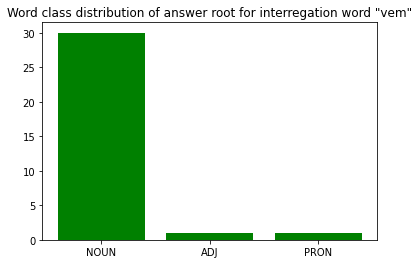

-------------------
pos tag:  VERB
root words, selection:  ['upptäcka', 'delta', 'godta', 'godta', 'planera']
-------------------
pos tag:  NUM
root words, selection:  ['24811', '522375', '24211b', '11831', '16411', '12411', '18611', '11831', '1911', '216']
-------------------
pos tag:  NOUN
root words, selection:  ['oktober', 'bemanningsföretag', 'juni', 'hjärt', 'turistchef', 'tita', 'mångfald', 'skogsplantering', 'arbete', 'slag']


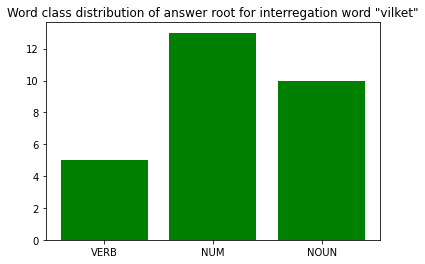

-------------------
pos tag:  NOUN
root words, selection:  ['försäkringskassa', 'stuteri', 'september', 'hälso', 'september', 'visummärke', 'fritidsgård', 'verkstad', 'lagerhantering', 'ojämnhet']
-------------------
pos tag:  VERB
root words, selection:  ['analysera', 'lega', 'utveckla']
-------------------
pos tag:  PROPN
root words, selection:  ['storbritannien', 'jukkasjärvi', 'eskilstuna', 'haag', 'ultuna', 'liberia']
-------------------
pos tag:  NUM
root words, selection:  ['69', '32']
-------------------
pos tag:  ADP
root words, selection:  ['i']


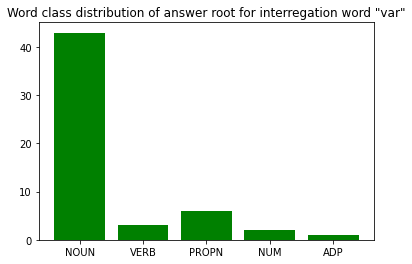

-------------------
pos tag:  VERB
root words, selection:  ['ändra', 'hänga', 'finnas', 'bedöma', 'rotera', 'slita', 'finnas', 'innebära', 'skydda', 'öka']
-------------------
pos tag:  ADJ
root words, selection:  ['anstränga', 'fysisk']


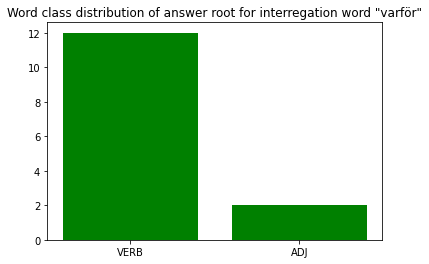

-------------------
pos tag:  NOUN
root words, selection:  ['adress', 'folkbokföringsad', 'kommun', 'landsting', 'kommun', 'adress', 'tid', 'adress', 'valmyndighet']


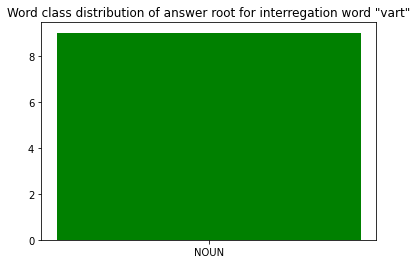

-------------------
pos tag:  NOUN
root words, selection:  ['person', 'person', 'officiant']


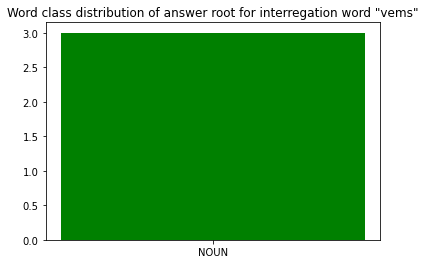

In [9]:
# interrogative word statistics: interrogative word -> word class of root of answer
i_words_map, i_words_map_count, interrogative_word_stats = get_interrogative_word_statistics(df_dp_train, 'answer')
# print the stats for the different interrogative words:
print_interrogative_word_appearance(interrogative_word_stats)
for key, value in i_words_map_count.items():
    print_interrogative_word_statistics(key, value, i_words_map[key])

-------------------
pos tag:  NOUN
root words, selection:  ['tillstånd', 'bevis', 'bevis', 'bevis', 'bevis', 'bevis', 'elinstallatör', 'kopia', 'kopia', 'forum']
-------------------
pos tag:  VERB
root words, selection:  ['ta', 'få', 'innehålla', 'ingå', 'innebära', 'sitta', 'få', 'innebära', 'bli', 'förebygga']
-------------------
pos tag:  PRON
root words, selection:  ['någon', 'man']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara']
-------------------
pos tag:  ADJ
root words, selection:  ['medgivande', 'viktig', 'datainriktad', 'viktig', 'viktig', 'fokusera', 'ovanlig', 'stor', 'vanlig', 'vanlig']
-------------------
pos tag:  NUM
root words, selection:  ['2']


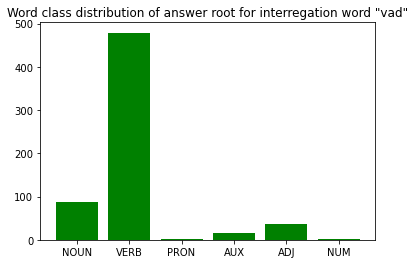

-------------------
pos tag:  VERB
root words, selection:  ['ta', 'ansöka', 'ta', 'dokumentera', 'ta', 'få', 'meddela', 'kontrollera', 'behöva', 'få']
-------------------
pos tag:  NOUN
root words, selection:  ['dag', 'september', 'undantag']
-------------------
pos tag:  ADJ
root words, selection:  ['skyldig', 'vanlig', 'statslös', 'inrikta']


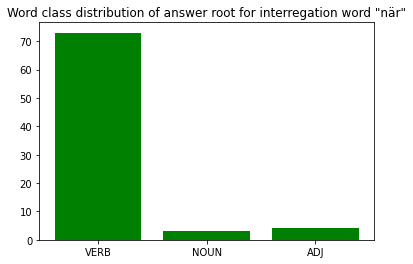

-------------------
pos tag:  VERB
root words, selection:  ['gälla', 'utföra', 'bero', 'gälla', 'ha', 'hålla', 'få', 'kräva', 'ha', 'stå']
-------------------
pos tag:  NOUN
root words, selection:  ['år', 'tillstånd', 'kvitto', 'forskningsuniversitet']
-------------------
pos tag:  ADJ
root words, selection:  ['lång', 'lång', 'lång', 'lång', 'inrikta', 'noggrann', 'stor', 'etablerad', 'viktig']
-------------------
pos tag:  PRON
root words, selection:  ['en']
-------------------
pos tag:  AUX
root words, selection:  ['vara']


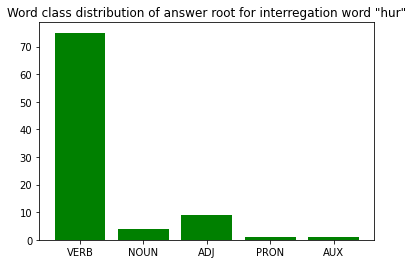

-------------------
pos tag:  NUM
root words, selection:  ['7']
-------------------
pos tag:  VERB
root words, selection:  ['genomföra', 'lämna', 'ske', 'läsa', 'använda', 'skicka', 'betrakta', 'bota', 'vara', 'inrikta']
-------------------
pos tag:  NOUN
root words, selection:  ['svetsmetod', 'exempel', 'arbetsplats', 'arbetsuppgift', 'del', 'gång']
-------------------
pos tag:  ADJ
root words, selection:  ['förankra']


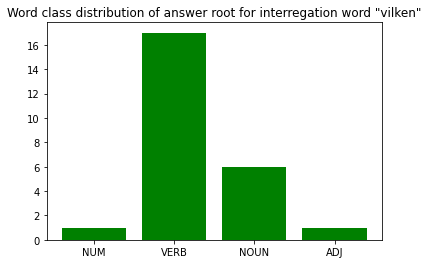

-------------------
pos tag:  VERB
root words, selection:  ['rikta', 'sköta', 'representera', 'ske', 'undanta', 'invalda', 'arbeta', 'samarbeta', 'arbeta', 'beskära']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara']
-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'jobb', 'vårdnadshavare', 'arbetsledare', 'företag', 'ärendeslag']
-------------------
pos tag:  ADJ
root words, selection:  ['vanlig', 'vanlig']


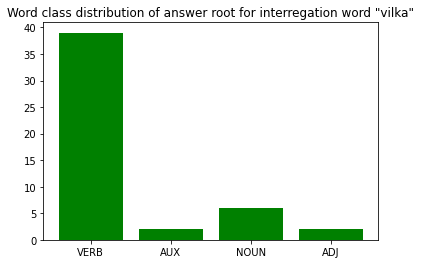

-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'fråga', 'arbetsgivare', 'mellanman', 'befälhavare', 'ambulanssjukvårdare', 'ortopedingenjör', 'arbetsledare', 'vårdnadshavare', 'person']
-------------------
pos tag:  VERB
root words, selection:  ['finnas', 'se', 'besiktiga', 'se', 'utföra', 'kontrollera', 'företräda', 'utgå', 'göra', 'kommunicera']


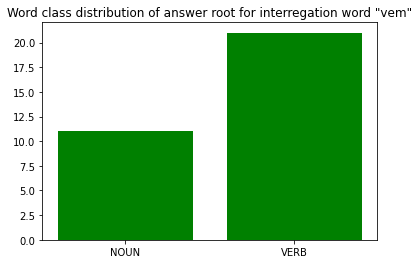

-------------------
pos tag:  VERB
root words, selection:  ['vända', 'fylla', 'förekomma', 'betala', 'förvänta', 'gälla', 'fylla', 'välja', 'fylla', 'gälla']
-------------------
pos tag:  ADJ
root words, selection:  ['gemensam']
-------------------
pos tag:  NOUN
root words, selection:  ['försäkra', 'ansökan', 'ansökan', 'programutbildning', 'turistchef', 'säsongsarbete']


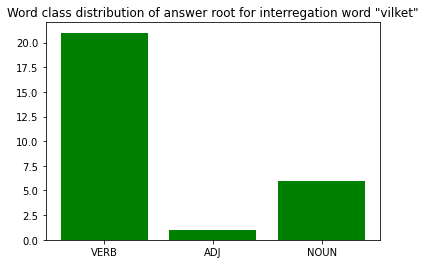

-------------------
pos tag:  VERB
root words, selection:  ['arbeta', 'arbeta', 'granska', 'arbeta', 'stå', 'arbeta', 'arbeta', 'finnas', 'lägga', 'använda']
-------------------
pos tag:  NOUN
root words, selection:  ['dag', 'september', 'anställd', 'säsongsarbete', 'anställd', 'besök', 'initiativ']
-------------------
pos tag:  ADJ
root words, selection:  ['kort', 'fortsätta']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara']


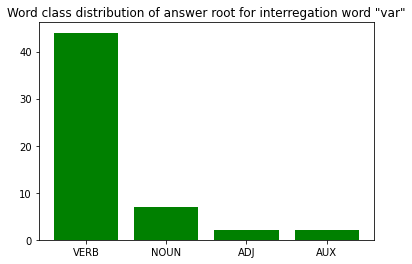

-------------------
pos tag:  VERB
root words, selection:  ['justera', 'klättra', 'arbeta', 'få', 'ha', 'vilja', 'göra', 'förebygga', 'ställa', 'pågå']
-------------------
pos tag:  ADJ
root words, selection:  ['viktig', 'utrusta', 'viktig']
-------------------
pos tag:  NOUN
root words, selection:  ['arbete']


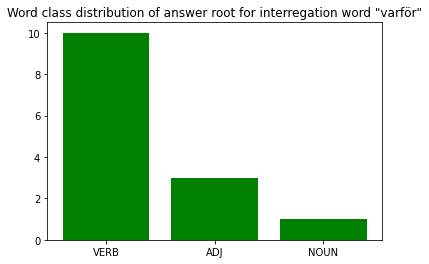

-------------------
pos tag:  VERB
root words, selection:  ['skicka', 'skicka', 'kontakta', 'kontakta', 'kontakta', 'skicka', 'besöka', 'skicka', 'kontakta']


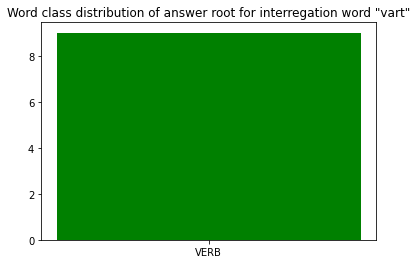

-------------------
pos tag:  NOUN
root words, selection:  ['födelsedatum', 'namnteckning', 'uppgift']


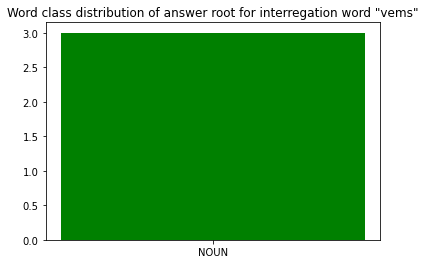

In [10]:
# interrogative word statistics: interrogative word -> word class of root of answer
i_words_map, i_words_map_count, _ = get_interrogative_word_statistics(df_dp_train, 'sent')
for key, value in i_words_map_count.items():
    print_interrogative_word_statistics(key, value, i_words_map[key])